In [1]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PlotFuncs import *
from AxionFuncs import *
from matplotlib import colors as c
import cmasher as cmr

n = 500
fvals = logspace(6,17,n)
epsvals = logspace(-10,0,n)
f,eps = meshgrid(fvals,epsvals)


n = 500
f_helio = logspace(6,10,n)
e_helio = logspace(-10,0,n)
IAXO = MapHelioscope_m1('Projections/IAXO',f_helio,e_helio)+MapHelioscope_m2('Projections/IAXO',f_helio,e_helio)

n = 1000
f_halo = logspace(6,17,n)
e_halo = logspace(-10,0,n)
ADMX = MapHaloscope_m1('ADMX',f_halo,e_halo)+MapHaloscope_m2('ADMX',f_halo,e_halo)
ADMX += MapHaloscope_m1('ADMX2018',f_halo,e_halo)+MapHaloscope_m2('ADMX2018',f_halo,e_halo)
ADMX += MapHaloscope_m1('ADMX2019_1',f_halo,e_halo)+MapHaloscope_m2('ADMX2019_1',f_halo,e_halo)
ADMX += MapHaloscope_m1('ADMX2019_2',f_halo,e_halo)+MapHaloscope_m2('ADMX2019_2',f_halo,e_halo)
DMRadio = MapHaloscope_m1('Projections/DMRadio',f_halo,e_halo)+MapHaloscope_m2('Projections/DMRadio',f_halo,e_halo)

n = 500
f_mm = logspace(6,13,n)
e_mm = logspace(-4,0,n)
MADMAX = MapHaloscope_m1('Projections/MADMAX',f_mm,e_mm)+MapHaloscope_m2('Projections/MADMAX',f_mm,e_mm)


f_sr = logspace(8,19,1000)
e_sr = logspace(-10,0,1000)
SR = Superradiance('Mehta',f_sr,e_sr)

/Users/ciaranohare/Work/TwoAxions/AxionFuncs.py:55: RuntimeWarning: invalid value encountered in sqrt
  m2 = 1e9*sqrt(K_QCD/f**2*((N0+N1*eps**2)-(4*N2**2*eps**2 + (N0-N1*eps**2)**2)**0.5))


/Users/ciaranohare/Work/TwoAxions/PlotFuncs.py:61: UserWarning: No contour levels were found within the data range.
  ax.contour(fvals,epsvals,con,levels=[0],linewidths=lw,colors=edgecolor,linestyles=linestyle,zorder=zorder)


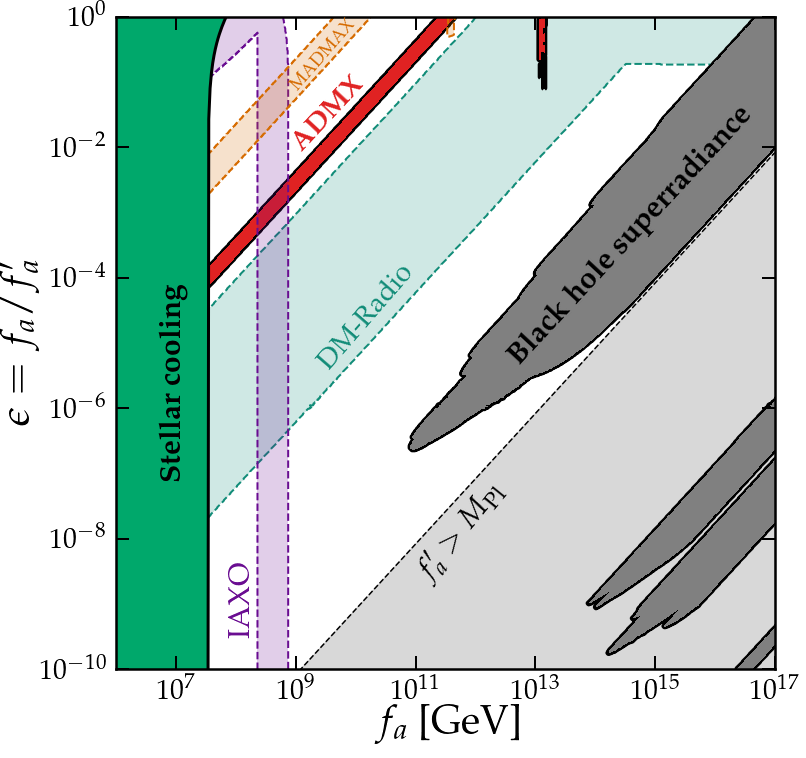

In [5]:
fig,ax1 = Plot_PQscales_OnePanel(fvals,epsvals,lfs=40,size_x=11.8)


PlotContour(ax1,f_halo,e_halo,ADMX,zorder=-1,alpha=1.0,lw=5,facecolor=ADMX_col,edgecolor='k',linestyle='-')
PlotContour(ax1,f_helio,e_helio,IAXO,zorder=-1,alpha=0.2,facecolor=IAXO_col,edgecolor=IAXO_col,linestyle='--')
PlotContour(ax1,f_mm,e_mm,MADMAX,zorder=-1,alpha=0.2,facecolor=MADMAX_col,edgecolor=MADMAX_col,linestyle='--')
PlotContour(ax1,f_halo,e_halo,DMRadio,zorder=-1.1,alpha=0.2,facecolor=DMRadio_col,edgecolor=DMRadio_col,linestyle='--')

ax1.text(2e9,4e-6,r'DM-Radio',color=DMRadio_col,rotation=49)
ax1.text(7e8,9e-3,r'{\bf ADMX}',color=ADMX_col,rotation=47)
ax1.text(7.5e8,7.5e-2,r'MADMAX',color=MADMAX_col,rotation=49,fontsize=18)
ax1.text(0.75e8,4e-10,r'IAXO',color=IAXO_col,rotation=90,fontsize=30)

# Superradiance
PlotContour(ax1,f_sr,e_sr,SR,zorder=0.1,alpha=1.0,lw=5,facecolor='gray',edgecolor='k',linestyle='-')
ax1.text(3e12,5e-6,r'{\bf Black hole superradiance}',fontsize=30,color='k',rotation=47)



StellarCooling(ax1,fvals)




ax1.set_ylabel(r'$\epsilon = f_a/f^\prime_a$',labelpad=-10)
ax1.fill_between(fvals,fvals/1.2e19,y2=1e-99,alpha=0.3,color='gray',zorder=0)
ax1.plot(fvals,fvals/1.2e19,'k--',zorder=0)
ax1.text(1e11,0.2e-8,r'$f^\prime_a > M_{\rm Pl}$',rotation=51,fontsize=30)

MySaveFig(fig,'Constraints')